In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from ipywidgets import interact, interactive, fixed, interact_manual

### Importing the number of business applications

Taking our existing data of business applications and importing as a DataFrame

In [83]:
df = pd.read_csv("data05-22/biz_apps_new.csv")
df = df.rename(columns={"State":"STATE"}).round(2)
df.head()

,Name,STATE,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,AL,31078,33918,33701,32222,29221,29916,28994,29694,29331,29574,31506,34286,36760,41948,41478,58557,75443,70750
1,Alaska,AK,4730,5229,5138,4979,4396,4661,5083,5210,5383,5447,5901,6358,7263,9238,8118,8063,8063,8456
2,Arizona,AZ,56547,63067,64673,62972,58279,57926,57837,55305,55516,56401,57176,61448,67833,73424,76539,89957,113142,115080
3,Arkansas,AR,19133,20400,19630,18707,17927,17843,17939,17812,17551,18445,19033,20445,23135,25678,25473,32314,41599,37562
4,California,CA,271636,286652,286737,271606,249246,256436,270057,268103,278014,293443,303657,312636,326592,364807,364924,438554,519236,485954


### Importing the geographical file for the US states

Using geopandas, we create a dataframe of the US States with their name, longitude, latitude and geometry

In [84]:
shapefile = 's_08mr23/s_08mr23.shp'
gdf = gpd.read_file(shapefile)
gdf.head()

,STATE,NAME,FIPS,LON,LAT,geometry
0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
1,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
2,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-168.14924 -14.53377, -168.148..."
3,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
4,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."


In [85]:
#drop Puerto rico, Fed States of Micronesia, American Samoa, US Virgin Islands, Guam, Commonwealth of the northern mariana islands from file
gdf = gdf.drop(index=[2,37,44,52,54,55,56,57])
gdf = gdf.reset_index(drop=True)

In [86]:
len(gdf) #it is the same as len(df)

51

<IPython.core.display.Javascript object>


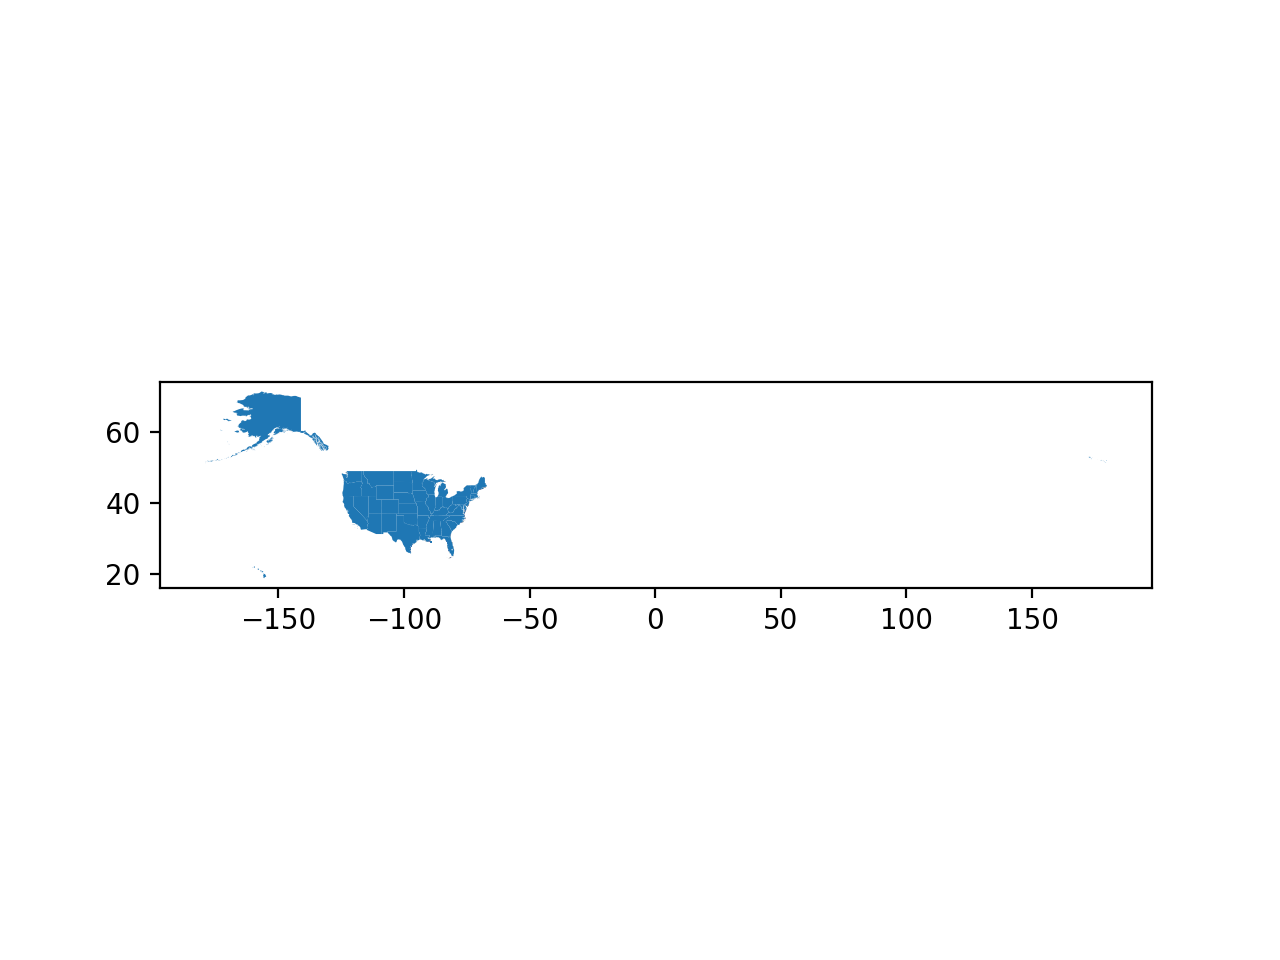

<Axes: >

In [87]:
gdf.plot()

We see the issue here - due to Alaska and Hawaii, we are unable to get a closer look at the US. We will remove these and add them separately to our final graph

### Clipping Alaska and Hawaii
Creating a dataset that will only include the business applications from 2022 as a column

In [114]:
df_diff = df[['STATE','2005','2022']].copy()
df_diff = df_diff.rename(columns={"2005":"BA_2005", "2022":"BA_2022"})
df_diff.head()

,STATE,BA_2005,BA_2022
0,AL,31078,70750
1,AK,4730,8456
2,AZ,56547,115080
3,AR,19133,37562
4,CA,271636,485954


We are going to clip Hawaii and Alaska and add them separately. 

<IPython.core.display.Javascript object>


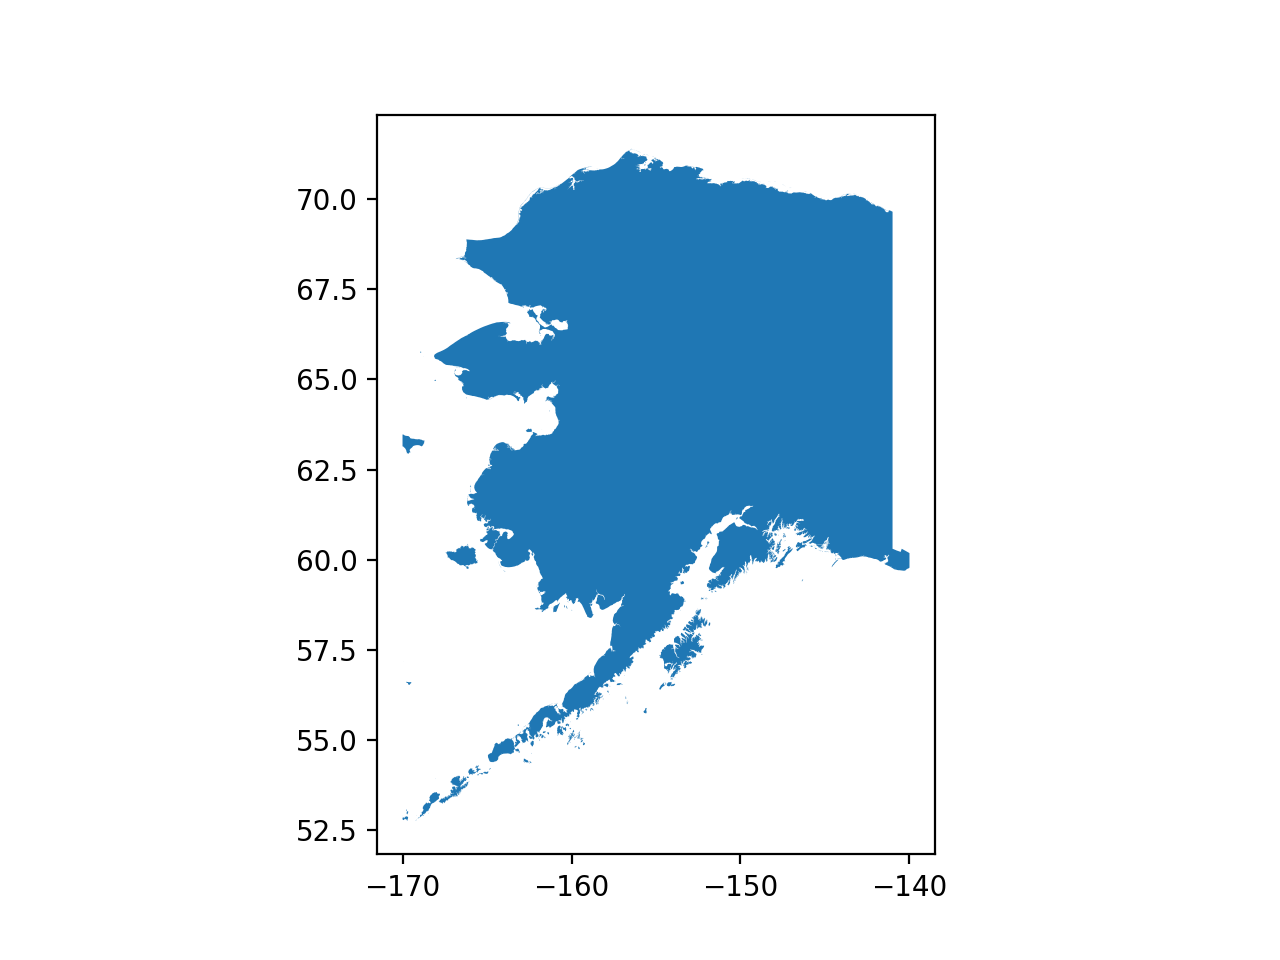

<Axes: >

In [115]:
alaska_gdf = gdf[gdf.STATE=='AK']
alaska_gdf = alaska_gdf.merge(df_diff, on="STATE")
#clipping some of the western islands to make it fit better
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = alaska_gdf.clip(polygon)
alaska_gdf.plot() 

<IPython.core.display.Javascript object>


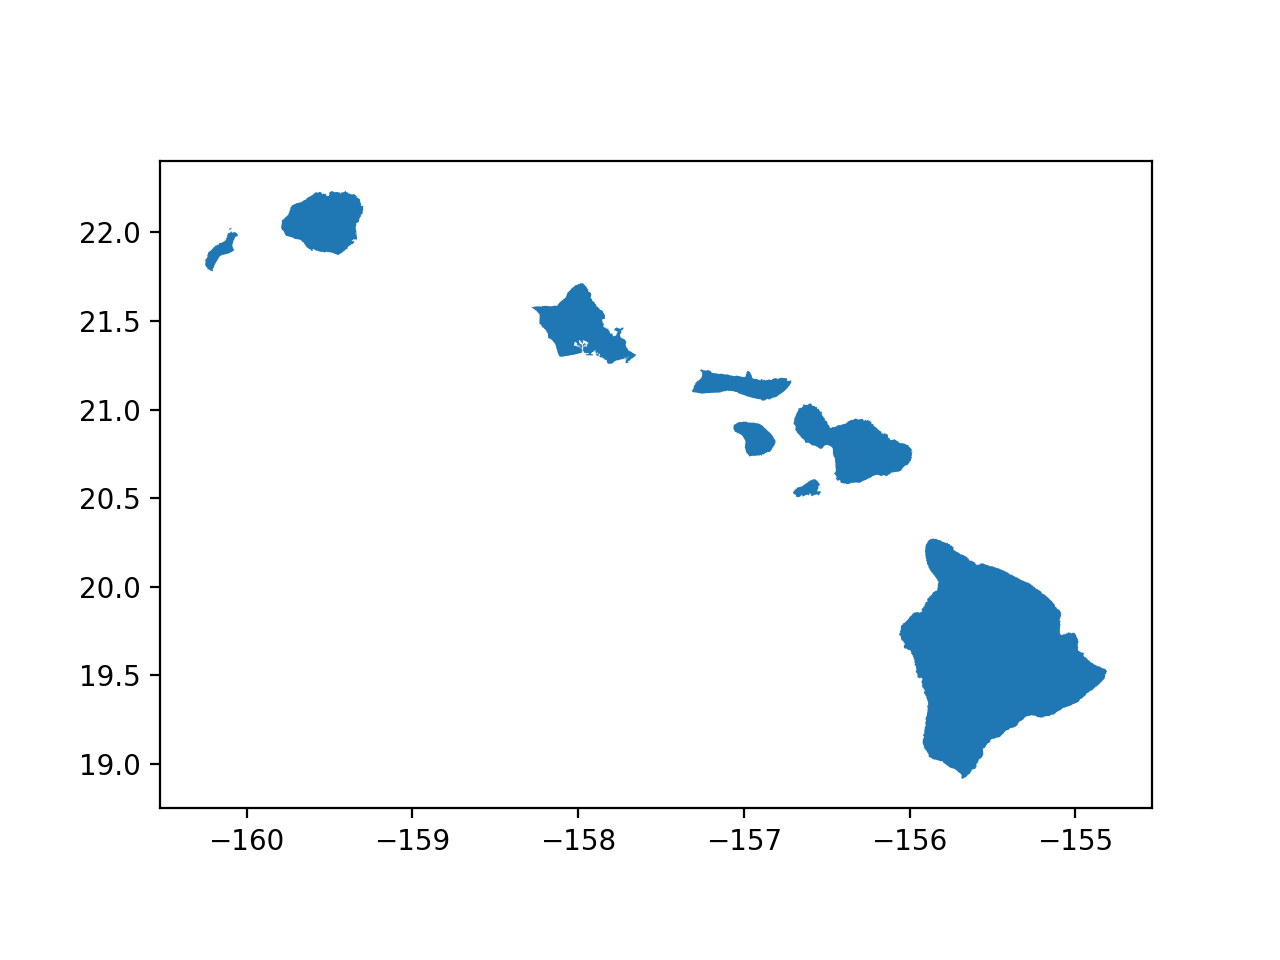

<Axes: >

In [116]:
hawaii_gdf = gdf[gdf.STATE=='HI']
hawaii_gdf = hawaii_gdf.merge(df_diff, on="STATE")
hawaii_gdf
hawaii_gdf.plot()

Removing Alaska and Hawaii from the table due to mapping errors. Will add back later separately.

In [117]:
gdf_map = gdf.drop(gdf[gdf['STATE'] == 'AK'].index)
gdf_map = gdf_map.drop(gdf_map[gdf_map['STATE'] == 'HI'].index)
len(gdf_map)

49

In [118]:
gdf_new = gdf_map.merge(df_diff, on="STATE")
gdf_new.head()

,STATE,NAME,FIPS,LON,LAT,geometry,BA_2005,BA_2022
0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",31078,70750
1,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",19133,37562
2,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",56547,115080
3,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",271636,485954
4,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0...",55916,115689


In [119]:
alaska_gdf

,STATE,NAME,FIPS,LON,LAT,geometry,BA_2005,BA_2022
0,AK,Alaska,02,-152.255721,64.242373,"MULTIPOLYGON (((-169.16139 52.79556, -169.1610...",4730,8456


In [124]:
print(gdf_new['BA_2022'].max())
print(gdf_new['BA_2005'].max())

607279
281702


Plotting the values on a geographical map we get a heatmap:

<IPython.core.display.Javascript object>


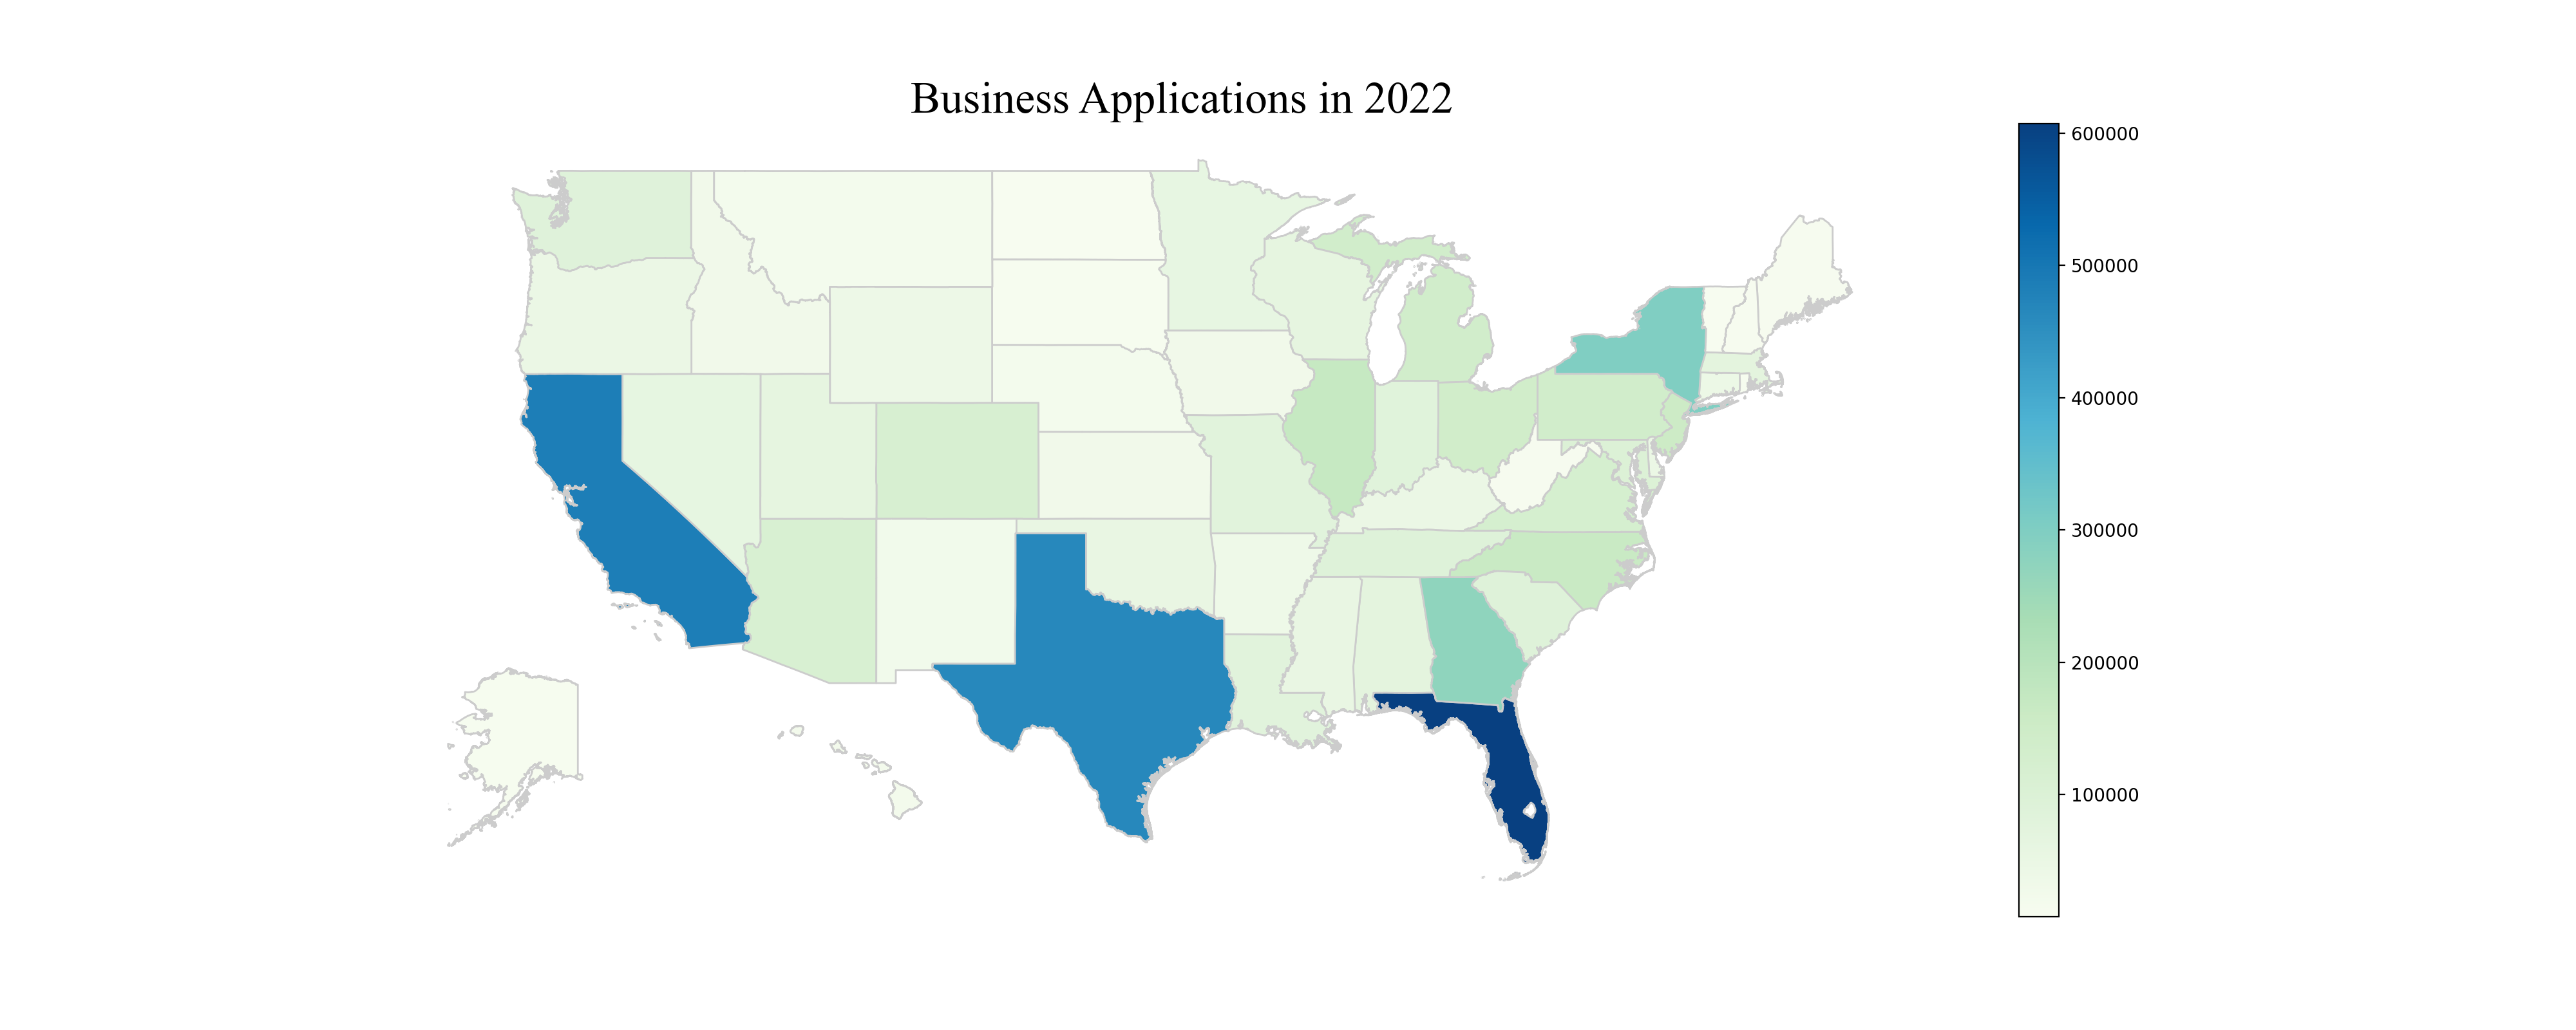

<Axes: >

In [127]:
# Print the map for 2022
# Set the range for the choropleth
title = 'Business Applications in 2022'
col = 'BA_2022'
vmin = gdf_new['BA_2005'].min()
vmax = gdf_new['BA_2022'].max()
cmap = 'GnBu'
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
# Remove the axis
ax.axis('off')
gdf_new.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap, legend=True)
# Add a title
ax.set_title(title, fontdict={'fontname': 'Times New Roman','fontsize': '25', 'fontweight': '3'})
# Create an annotation for the data source

#Add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
alaska_gdf.plot(column=alaska_gdf[col], cmap="GnBu", ax=akax, linewidth=1, edgecolor='0.8', vmin = vmin, vmax=vmax)

#Add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])      
hiax.axis('off')
hawaii_gdf.plot(column=hawaii_gdf[col], cmap="GnBu", ax=hiax, linewidth=1, edgecolor='0.8', vmin = vmin, vmax=vmax)



<IPython.core.display.Javascript object>


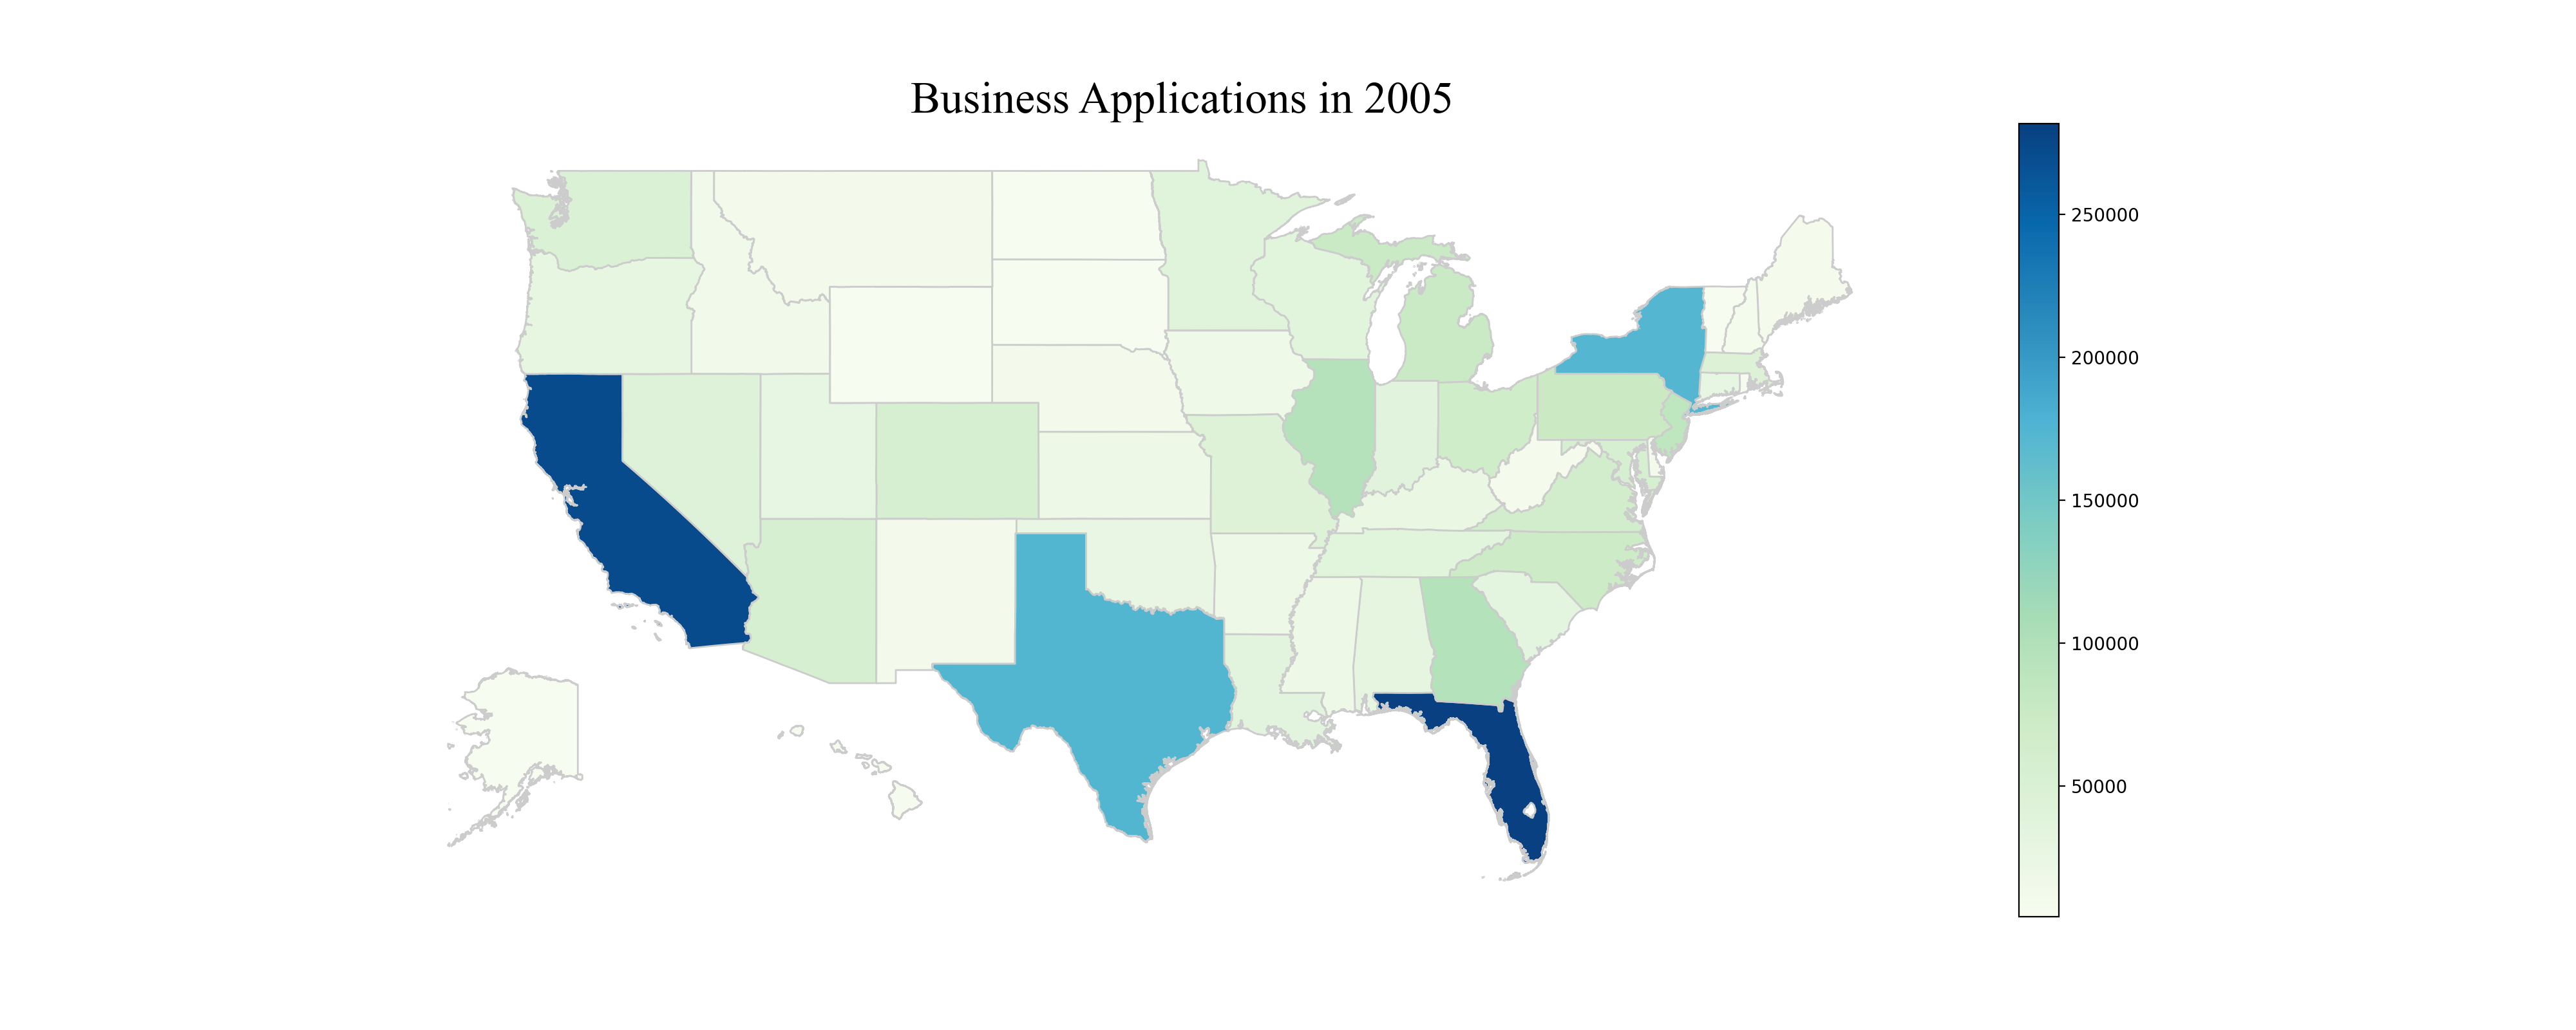

<Axes: >

In [128]:
# Print the map for 2005
# Set the range for the choropleth
title = 'Business Applications in 2005'
col = 'BA_2005'
vmin = gdf_new['BA_2005'].min()
vmax = gdf_new['BA_2022'].max()
cmap = 'GnBu'
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
# Remove the axis
ax.axis('off')
gdf_new.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap, legend=True)
# Add a title
ax.set_title(title, fontdict={'fontname': 'Times New Roman','fontsize': '25', 'fontweight': '3'})
# Create an annotation for the data source

#Add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
alaska_gdf.plot(column=alaska_gdf[col], cmap="GnBu", ax=akax, linewidth=1, edgecolor='0.8', vmin = vmin, vmax=vmax)

#Add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])      
hiax.axis('off')
hawaii_gdf.plot(column=hawaii_gdf[col], cmap="GnBu", ax=hiax, linewidth=1, edgecolor='0.8', vmin = vmin, vmax=vmax)

